# Telecom Churn Prediction | Neural Network Classifier

## Import relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf

## Load preprocessed data

In [2]:
df_preprocessed = pd.read_csv('../data/processed/preprocessed_telco.csv')

In [3]:
df_preprocessed.head()

,tenure,MonthlyCharges,TotalCharges,service_count,loyalty_score,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0.013889,0.115423,0.003437,0.125,0.000000,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
1,0.472222,0.385075,0.217564,0.375,0.119895,1,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
2,0.027778,0.354229,0.012453,0.375,0.000000,1,0,0,0,1,...,0,0,0,0,0,1,0,0,1,1
3,0.625000,0.239303,0.211951,0.375,0.133579,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0.027778,0.521891,0.017462,0.125,0.000000,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,1


## Independent and Dependent variables

In [4]:
X = df_preprocessed.drop('Churn_Yes', axis=1)
y = df_preprocessed['Churn_Yes']

In [5]:
y.value_counts()

Churn_Yes
0    5174
1    1869
Name: count, dtype: int64

## Converting data to numpy arrays

In [6]:
X = X.values
y = y.values

## Train Test Split

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [8]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5634, 32)
(1409, 32)
(5634,)
(1409,)


## Hanlde class imbalance 

In [9]:
from sklearn.utils import class_weight

In [10]:
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

In [11]:
class_weights_dict = dict(enumerate(class_weights))

## Neural Network Model

In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='gelu', input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(64, activation='gelu', kernel_regularizer=tf.keras.regularizers.l2(1e-4)),
    tf.keras.layers.Dense(32, activation='gelu', kernel_regularizer=tf.keras.regularizers.l2(1e-4)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

c:\Users\sanid\VS Projects\Telecom_Churn_Prediction\.venv\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)

In [14]:
model.compile(
    optimizer=optimizer,
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)

In [15]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True
)

In [16]:
history = model.fit(
    x_train,
    y_train, 
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    class_weight=class_weights_dict,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5536 - auc: 0.6980 - loss: 0.6856 - val_accuracy: 0.6948 - val_auc: 0.7986 - val_loss: 0.6107
Epoch 2/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7142 - auc: 0.8219 - loss: 0.5899 - val_accuracy: 0.7232 - val_auc: 0.8087 - val_loss: 0.5370
Epoch 3/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7427 - auc: 0.8258 - loss: 0.5307 - val_accuracy: 0.6983 - val_auc: 0.8126 - val_loss: 0.5689
Epoch 4/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7547 - auc: 0.8429 - loss: 0.5012 - val_accuracy: 0.7134 - val_auc: 0.8159 - val_loss: 0.5481
Epoch 5/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7460 - auc: 0.8413 - loss: 0.5027 - val_accuracy: 0.7107 - val_auc: 0.8174 - val_loss: 0.5539
Epoch 6/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7657 - auc: 0.8541 - loss: 0.4891 - val_accuracy: 0.7205 - val_auc: 0.8186 - val_loss: 0.5463
Epoch 7/100
141/141 ━━━━━━━━━━━━━━

## Evaluate the Model

### Plot loss

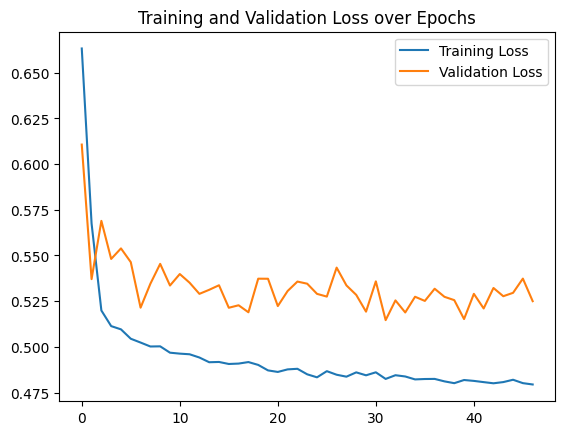

In [17]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss over Epochs')
plt.show()

### Test Accuracy

In [18]:
test_loss, test_acc, test_auc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}, Test AUC: {test_auc:.4f}")

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7545 - auc: 0.8357 - loss: 0.5039
Test Accuracy: 0.7537, Test AUC: 0.8389


In [19]:
y_pred_prob = model.predict(x_test)

y_pred = (y_pred_prob > 0.5).astype(int)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


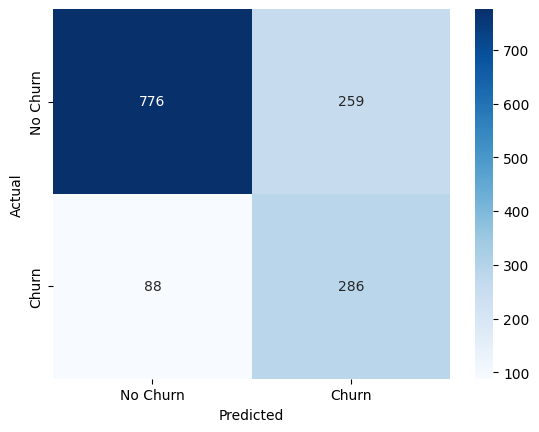

In [20]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Plot ROC Curve

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step
ROC-AUC score: 0.838923764499212


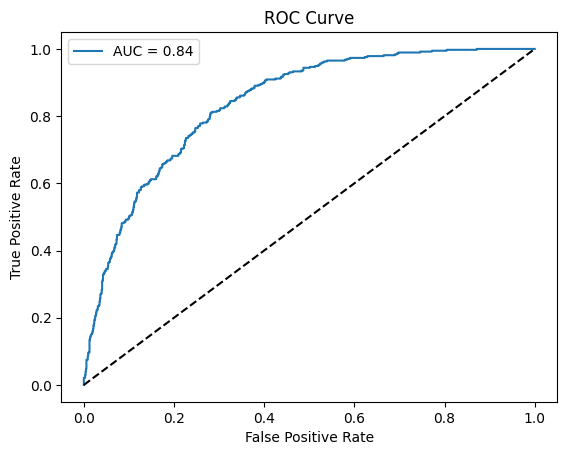

In [21]:
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_prob = model.predict(x_test)
auc = roc_auc_score(y_test, y_pred_prob)
print("ROC-AUC score:", auc)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Random baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## Tuning the Model

Performing Hyperparameter tuning with keras-tuner

In [22]:
import keras_tuner as kt
from tensorflow import keras
from sklearn.metrics import f1_score, precision_score, recall_score

In [23]:
def build_model(hp):
    model = keras.Sequential()

    model.add(keras.layers.Dense(
        units=hp.Int("units_1", min_value=128, max_value=256, step=32),
        activation=hp.Choice("act_1", ["relu", "gelu", "swish"]),
        kernel_regularizer=keras.regularizers.l2(
            hp.Float("l2_1", 1e-6, 1e-3, sampling="log")
        ),
        input_shape=(x_train.shape[1],)
    ))
    model.add(keras.layers.Dropout(
        hp.Float("dropout_1", 0.1, 0.3, step=0.05)
    ))

    model.add(keras.layers.Dense(
        units=hp.Int("units_2", min_value=64, max_value=128, step=16),
        activation=hp.Choice("act_2", ["relu", "gelu", "selu", "tanh"]),
        kernel_regularizer=keras.regularizers.l2(
            hp.Float("l2_2", 1e-6, 1e-3, sampling="log")
        )
    ))
    model.add(keras.layers.Dropout(
        hp.Float("dropout_2", 0.1, 0.3, step=0.05)
    ))

    if hp.Boolean("use_layer_3"):
        model.add(keras.layers.Dense(
            units=hp.Int("units_3", min_value=32, max_value=64, step=8),
            activation=hp.Choice("act_3", ["relu", "gelu", "selu", "tanh"]),
            kernel_regularizer=keras.regularizers.l2(
                hp.Float("l2_3", 1e-6, 1e-3, sampling="log")
            )
        ))
        model.add(keras.layers.Dropout(
            hp.Float("dropout_3", 0.1, 0.3, step=0.05)
        ))

    model.add(keras.layers.Dense(1, activation="sigmoid"))

    optimizer = keras.optimizers.Adam(
        hp.Float("learning_rate", 1e-5, 1e-3, sampling="log")
    )

    model.compile(
        optimizer=optimizer,
        loss=keras.losses.BinaryCrossentropy(label_smoothing=0.05),
        metrics=["accuracy", keras.metrics.AUC(name="auc")]
    )

    return model

In [24]:
tuner = kt.Hyperband(
    build_model,
    objective=kt.Objective("val_auc", direction="max"),
    max_epochs=50,
    factor=3,
    directory="hyperband_tuning",
    project_name="churn_model_tuning"
)

Reloading Tuner from hyperband_tuning\churn_model_tuning\tuner0.json


In [25]:
early_stop = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=10,
    restore_best_weights=True
)

In [26]:
tuner.search(
    x_train,
    y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    class_weight=class_weights_dict,
    verbose=1
)

## Selecting the Best Model

In [27]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score

In [28]:
results = []

models = tuner.get_best_models(num_models=90)

for i, model in enumerate(models):
    y_pred_prob = model.predict(x_test)
    y_pred = (y_pred_prob > 0.5).astype(int)

    results.append({
        "model_id": i,
        "accuracy": accuracy_score(y_test, y_pred),
        "auc": roc_auc_score(y_test, y_pred_prob),
        "f1": f1_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred),
        "recall": recall_score(y_test, y_pred),
        "loss": model.evaluate(x_test, y_test, verbose=0)[0]
    })

df_results = pd.DataFrame(results)

c:\Users\sanid\VS Projects\Telecom_Churn_Prediction\.venv\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\sanid\VS Projects\Telecom_Churn_Prediction\.venv\lib\site-packages\keras\src\saving\saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
c:\Users\sanid\VS Projects\Telecom_Churn_Prediction\.venv\lib\site-packages\keras\src\saving\saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
45/45 ━━━━━━━━━━━━

In [29]:
df_results.head()

,model_id,accuracy,auc,f1,precision,recall,loss
0,0,0.745209,0.841114,0.620106,0.513135,0.783422,0.551925
1,1,0.753016,0.840463,0.615894,0.524436,0.745989,0.513158
2,2,0.747339,0.838965,0.622081,0.515845,0.783422,0.524978
3,3,0.755855,0.842714,0.623632,0.527778,0.762032,0.520717
4,4,0.756565,0.841133,0.623491,0.528864,0.759358,0.515176


In [30]:
def plot_model_performance(df_results, start, end):
    filtered_df = df_results[(df_results["model_id"] >= start) & (df_results["model_id"] <= end)]
    
    plt.figure(figsize=(12, 6))
    
    metrics = ["accuracy", "auc", "f1", "precision", "recall"]

    for m in metrics:
        plt.plot(filtered_df["model_id"], filtered_df[m], label=m, marker='o', drawstyle='steps-post')
    
    for model_id in filtered_df["model_id"].unique():
        plt.axvline(x=model_id, linestyle='--', color='gray', alpha=0.2)
    
    plt.xticks(filtered_df["model_id"].unique())
    plt.xlabel("Model ID")
    plt.ylabel("Score")
    plt.title(f"Model Performance Comparison from Model ID {start} to {end}")
    plt.legend()
    plt.show()

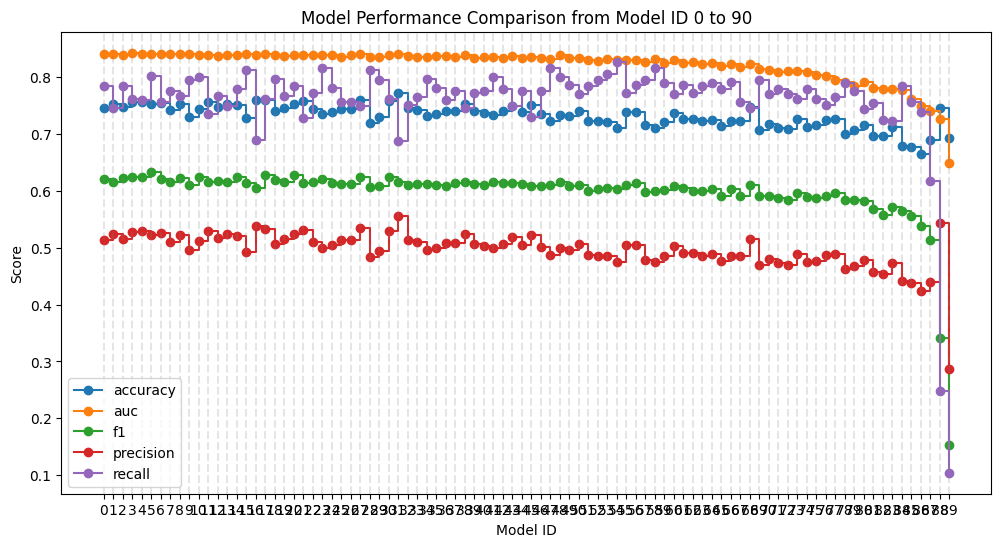

In [31]:
plot_model_performance(df_results, 0, 90)

There is a good selection point around 30. But the best metrics are not clear to this graph

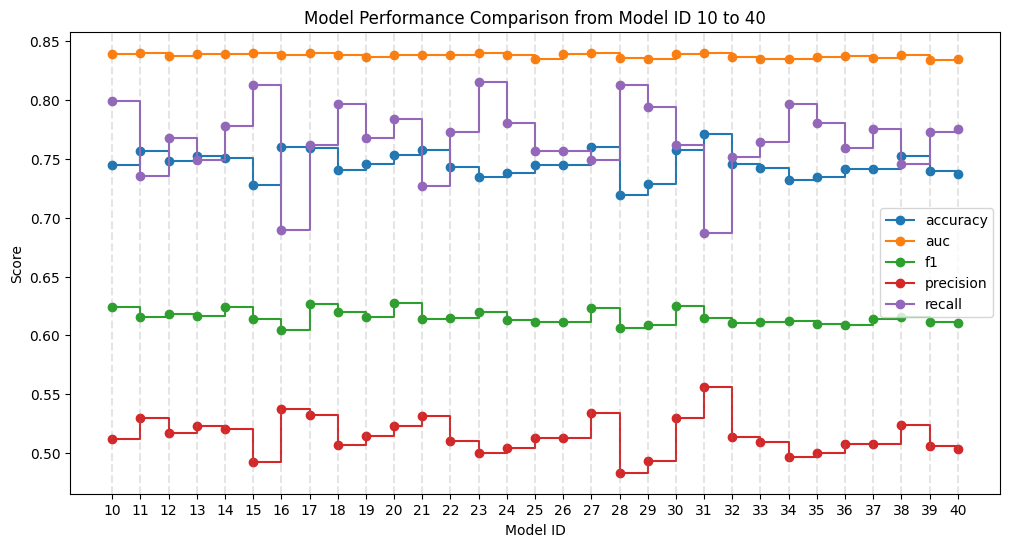

In [32]:
plot_model_performance(df_results, 10, 40)

In [33]:
df_results[(df_results['model_id'] == 27) | (df_results['model_id'] == 30)].T

,27,30
model_id,27.000000,30.000000
accuracy,0.760114,0.757275
auc,0.840159,0.839099
f1,0.623608,0.625000
precision,0.534351,0.529740
recall,0.748663,0.762032
loss,0.520651,0.509151


In [34]:
df_results.sort_values(by="accuracy", ascending=False).head(5)

,model_id,accuracy,auc,f1,precision,recall,loss
31,31,0.771469,0.840151,0.614833,0.556277,0.687166,0.499977
16,16,0.760114,0.838184,0.604215,0.537500,0.689840,0.488272
27,27,0.760114,0.840159,0.623608,0.534351,0.748663,0.520651
17,17,0.759404,0.839725,0.627063,0.532710,0.762032,0.540865
21,21,0.757275,0.838260,0.613995,0.531250,0.727273,0.519650


From the statistics we can see that model 27 has the third best accuracy.

By an overall analysis, focusing on all the metrics, the model 27 is selected as the best performing model in the tuning

## Extract The Best Performing Model

In [35]:
final_model = models[27]

In [36]:
final_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         8,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 112)            │        28,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 112)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           113 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,345 (145.88 KB)

 Trainable params: 37,345 (145.88 KB)

 Non-trainable params: 0 (0.00 B)

## Evaluate the Model

In [37]:
y_pred_prob = final_model.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype(int)

test_loss, test_acc, test_auc = final_model.evaluate(x_test, y_test, verbose=0)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [ ]:
print("Test Loss: ", test_loss)
print("Test Accuracy: ", test_acc)
print("Test AUC: ", test_auc)

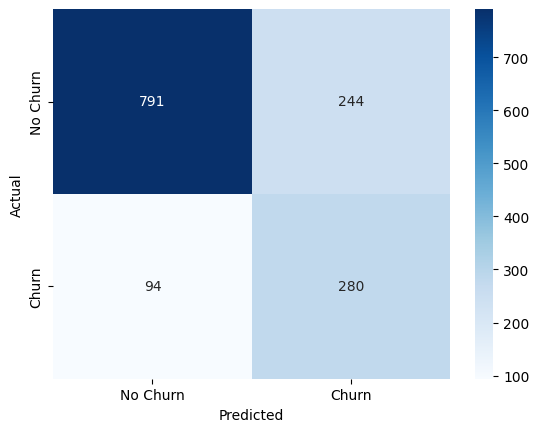

In [41]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1035
           1       0.53      0.75      0.62       374

    accuracy                           0.76      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.80      0.76      0.77      1409



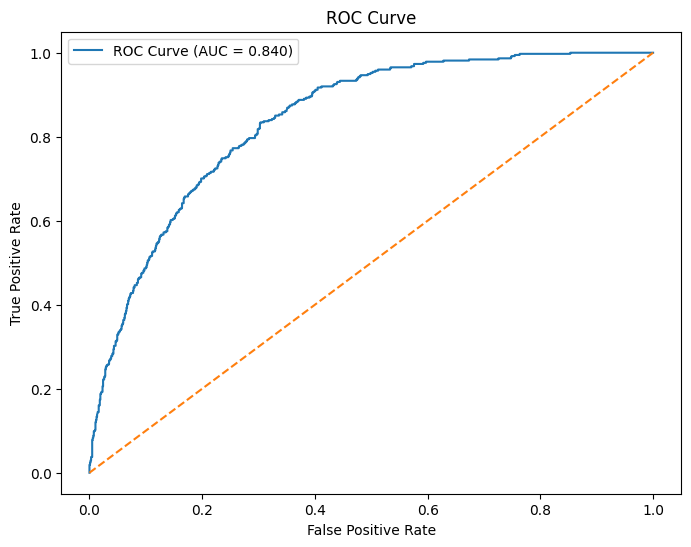

In [40]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [42]:
final_model_results = df_results[df_results['model_id'] == 27]

In [43]:
final_model_results

,model_id,accuracy,auc,f1,precision,recall,loss
27,27,0.760114,0.840159,0.623608,0.534351,0.748663,0.520651


## Summary of the Evaluation  

- **Model 27** outperformed the other candidates across accuracy, AUC, and additional evaluation metrics.  
- Compared to the initial baseline, the tuned model achieved higher accuracy and AUC.  
- Tuning improved **specificity**, reducing false positives (244 vs. 259), though sensitivity slightly declined with a small increase in false negatives (94 vs. 88). Overall, this reflects a better balance in correctly identifying non-churners.  
- While the performance gains were modest, the tuned model demonstrated greater reliability and consistency.  

**Final Selection:** Model 27 was chosen as the optimal model for deployment.  
